# Simulating Lower Spatial Resolution via Block Averaging

For every **non-overlapping** block of size 3 × 3, 5 × 5, and 7 × 7 the pixels are replaced by their mean value.  
The effect mimics reducing the spatial resolution ("pixelation").  
The original file is **task-4.jpg**.

In [14]:
# If any of these libraries are absent, uncomment and run the next line:
# !pip install pillow numpy matplotlib --quiet

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [16]:
# -------------------------------------------------------
# 1. Load image (RGB)
# -------------------------------------------------------
img_path = Path('task-4.jpg')
if not img_path.exists():
    raise FileNotFoundError('task-4.jpg not found in the current directory')

img = Image.open(img_path).convert('RGB')
img_np = np.array(img)
print(f'Loaded {img_path.name} → size: {img_np.shape[1]} × {img_np.shape[0]}')

Loaded task-4.jpg → size: 1020 × 510


In [17]:
# -------------------------------------------------------
# 2. Block-average function (non-overlapping)
# -------------------------------------------------------
def block_average(arr: np.ndarray, block_size: int) -> np.ndarray:
    """Return a copy of *arr* where every non-overlapping B×B block
    is filled with its average colour. Works for RGB or grayscale."""
    h, w = arr.shape[:2]
    c = 1 if arr.ndim == 2 else arr.shape[2]
    out = arr.copy()

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end = min(y + block_size, h)
            x_end = min(x + block_size, w)
            block = arr[y:y_end, x:x_end]
            mean_val = block.mean(axis=(0, 1), dtype=np.float32)
            out[y:y_end, x:x_end] = mean_val.astype(arr.dtype)
    return out

In [18]:
# -------------------------------------------------------
# 3. Apply block averaging for 3×3, 5×5, 7×7
# -------------------------------------------------------
sizes = [3, 5, 7]
results = {B: block_average(img_np, B) for B in sizes}

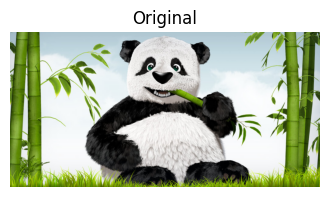

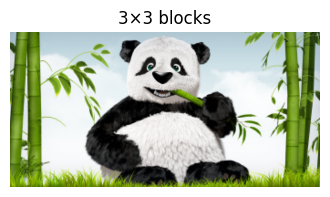

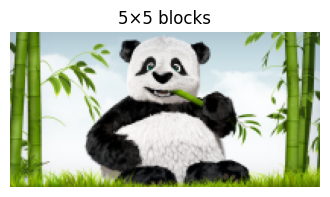

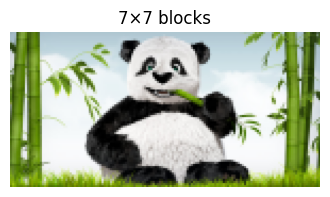

In [19]:
# -------------------------------------------------------
# 4. Display original and processed images one-by-one
# -------------------------------------------------------
import matplotlib.pyplot as plt

# list of (title, image-array) tuples
images_to_show = [('Original', img_np)] + [
    (f'{B}×{B} blocks', results[B]) for B in sizes
]

for title, arr in images_to_show:
    plt.figure(figsize=(4, 4))
    plt.imshow(arr)
    plt.title(title)
    plt.axis('off')
    plt.show()
